In [2]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
import keras
from keras import layers
from keras import models
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from itertools import product
from keras.applications import VGG16, ResNet50, MobileNetV2
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shutil
from PIL import Image

In [3]:
from tensorflow.keras.datasets import cifar10
(x_bigtrain, y_bigtrain), (x_test, y_test) = cifar10.load_data()

y_bigtrain = y_bigtrain.ravel()
y_test = y_test.ravel()

#split the data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_bigtrain, y_bigtrain, test_size=0.2, stratify=y_bigtrain, random_state=42)

images_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(images_classes)

x_train = np.array(x_train, np.float32)
x_train = x_train / 255.

x_val = np.array(x_val, np.float32)
x_val = x_val / 255.

x_test = np.array(x_test, np.float32)
x_test = x_test / 255.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


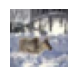

deer




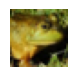

frog




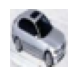

automobile




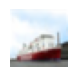

ship




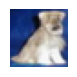

dog




In [4]:
total_number_of_images = x_train.shape[0]
number_of_images = 5 # number of images to display

for i in range(number_of_images):
    nomer_of_image = randint(1, total_number_of_images)
    plt.figure(figsize=(.75, .75))
    plt.imshow(x_train[nomer_of_image])
    plt.axis('off')
    plt.show()

    print(images_classes[y_train[nomer_of_image]])
    print()
    print()

In [5]:
print()
print(f'x_train Shape: {x_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print()
print(f'x_val Shape: {x_val.shape}')
print(f'y_val Shape: {y_val.shape}')
print()
print(f'x_test Shape: {x_test.shape}')
print(f'y_test Shape: {y_test.shape}')


x_train Shape: (40000, 32, 32, 3)
y_train Shape: (40000,)

x_val Shape: (10000, 32, 32, 3)
y_val Shape: (10000,)

x_test Shape: (10000, 32, 32, 3)
y_test Shape: (10000,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 39ms/step - accuracy: 0.2810 - loss: 2.1219 - val_accuracy: 0.4705 - val_loss: 1.5332
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.4561 - loss: 1.5277 - val_accuracy: 0.5059 - val_loss: 1.4429
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.5045 - loss: 1.3922 - val_accuracy: 0.5368 - val_loss: 1.3287
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.5353 - loss: 1.3147 - val_accuracy: 0.5436 - val_loss: 1.3466
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.5624 - loss: 1.2429 - val_accuracy: 0.6024 - val_loss: 1.1500
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.5790 - loss: 1.1918 - val_accuracy: 0.6081 - val_loss: 1.1535
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.5885 - loss: 1.1701 - val_accuracy: 0.5745 - val_loss: 1.2424
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.6018 - loss: 1.13

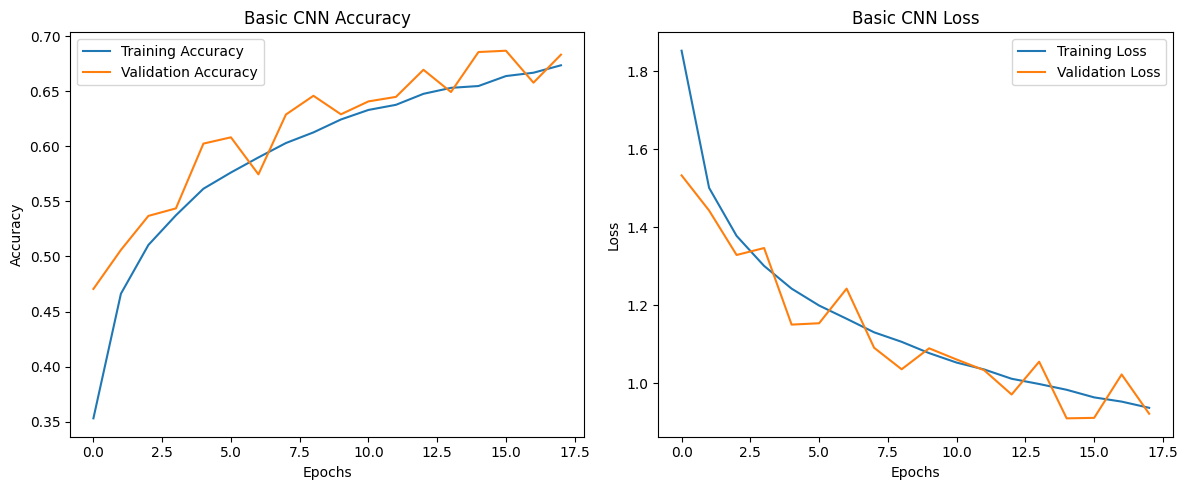

In [6]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from datetime import datetime
from itertools import product
from keras.applications import VGG16, ResNet50, MobileNetV2
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shutil
from PIL import Image

# Define a simple CNN model for baseline performance
def build_basic_cnn(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Train and evaluate the basic CNN model
input_shape = (32, 32, 3)
batch_size = 32

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1
)
datagen.fit(x_train)

basic_cnn = build_basic_cnn(input_shape, num_classes)
basic_cnn.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
basic_history = basic_cnn.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                              validation_data=(x_val, y_val),
                              epochs=25,
                              callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
                              verbose=1)

# Plot training and validation accuracy/loss for basic CNN
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(basic_history.history['accuracy'], label='Training Accuracy')
plt.plot(basic_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(basic_history.history['loss'], label='Training Loss')
plt.plot(basic_history.history['val_loss'], label='Validation Loss')
plt.title('Basic CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 43ms/step - accuracy: 0.1923 - loss: 2.0649 - val_accuracy: 0.3701 - val_loss: 1.6031 - learning_rate: 1.0000e-04
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.3763 - loss: 1.6083 - val_accuracy: 0.4661 - val_loss: 1.4367 - learning_rate: 1.0000e-04
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.4928 - loss: 1.3857 - val_accuracy: 0.5946 - val_loss: 1.1268 - learning_rate: 1.0000e-04
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.5734 - loss: 1.1737 - val_accuracy: 0.5983 - val_loss: 1.1754 - learning_rate: 1.0000e-04
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 42ms/step - accuracy: 0.6214 - loss: 1.0647 - val_accuracy: 0.6139 - val_loss: 1.1293 - learning_rate: 1.0000e-04
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.6631 - loss: 0.9570 - val_accuracy: 0.7068 - val_loss: 0.8222 - learning_rate: 1.0000e-04
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━

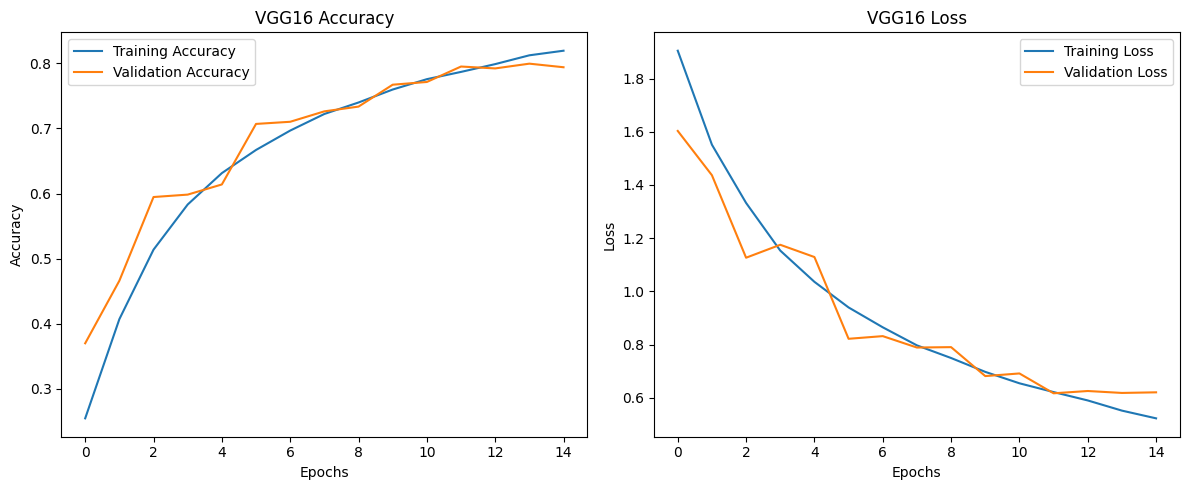

In [8]:
def build_model(base_model, num_classes, input_shape):
    base_model = base_model(input_shape=input_shape, include_top=False, weights=None)
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Set parameters
input_shape = (32, 32, 3)
batch_size = 32
epochs = 25

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=, verbose=1)

# Train and evaluate VGG16 models
models_histories = {}
models_val_accuracies = {}

# Define vgg16
vgg16_model = build_model(VGG16, num_classes, input_shape)

# Compile model
vgg16_model.compile(optimizer=Adam(learning_rate=1e-4),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train vgg16 and save history
vgg16_history = vgg16_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                validation_data=(x_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=[early_stopping, reduce_lr],
                verbose=1)
models_histories['VGG16'] = vgg16_history
models_val_accuracies['VGG16'] = max(vgg16_history.history['val_accuracy'])

# Plot training and validation accuracy/loss for vgg16
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("VGG16 Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.title(f"VGG16 Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 104s 43ms/step - accuracy: 0.2938 - loss: 2.0471 - val_accuracy: 0.4026 - val_loss: 1.7123 - learning_rate: 1.0000e-04
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 37ms/step - accuracy: 0.4374 - loss: 1.5466 - val_accuracy: 0.4601 - val_loss: 1.5069 - learning_rate: 1.0000e-04
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.4843 - loss: 1.4239 - val_accuracy: 0.5207 - val_loss: 1.3629 - learning_rate: 1.0000e-04
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.5288 - loss: 1.3137 - val_accuracy: 0.5075 - val_loss: 1.3757 - learning_rate: 1.0000e-04
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.5575 - loss: 1.2405 - val_accuracy: 0.6095 - val_loss: 1.1007 - learning_rate: 1.0000e-04
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.5882 - loss: 1.1573 - val_accuracy: 0.5935 - val_loss: 1.1531 - learning_rate: 1.0000e-04
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms

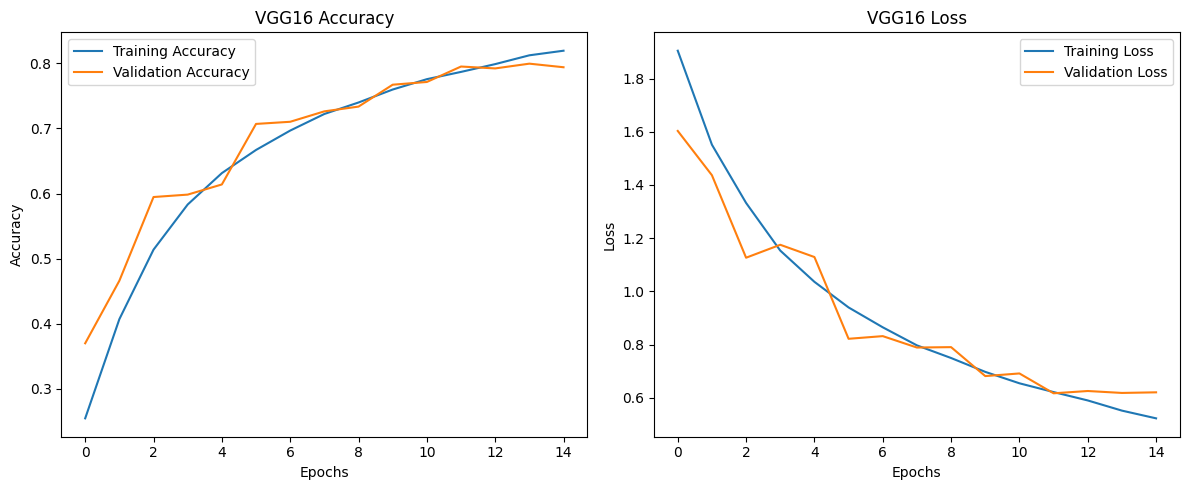

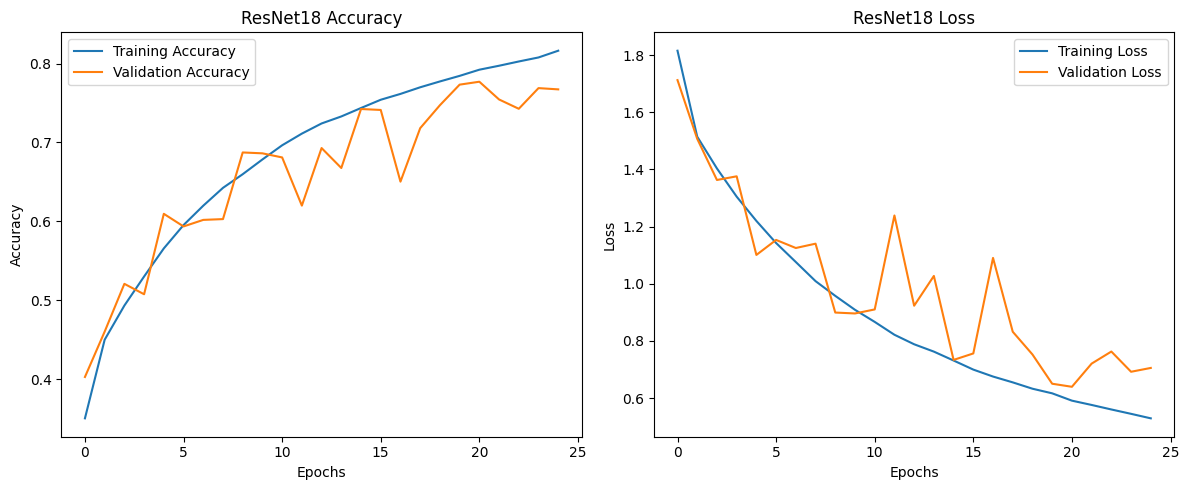

In [11]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

def residual_block(x, filters, downsample=False):
    # If downsampling is required
    shortcut = x

    if downsample or x.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=2 if downsample else 1, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Convolutional layer of the main path
    x = Conv2D(filters, (3, 3), strides=2 if downsample else 1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # residual connection
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x


def build_resnet18(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # initial convolution layer
    x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # residual block
    x = residual_block(x, 64)
    x = residual_block(x, 64, downsample=True)
    x = residual_block(x, 128)
    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 256)
    x = residual_block(x, 256, downsample=True)
    x = residual_block(x, 512)
    x = residual_block(x, 512, downsample=True)

    # global average pooling layer
    x = GlobalAveragePooling2D()(x)

    # output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model


# Define model
resnet18_model = build_resnet18(input_shape=input_shape, num_classes=num_classes)

# Compile model
for model in [resnet18_model]:
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train model and save history
for model_name, model in zip(['ResNet18'], [resnet18_model]):
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping, reduce_lr],
                        verbose=1)
    models_histories[model_name] = history
    models_val_accuracies[model_name] = max(history.history['val_accuracy'])

# Plot training and validation accuracy/loss for model
for model_name, history in models_histories.items():
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [12]:
# Select the best model based on validation accuracy
best_model_name = max(models_val_accuracies, key=models_val_accuracies.get)
print(f"Best model based on validation accuracy: {best_model_name} with accuracy: {models_val_accuracies[best_model_name]:.4f}")

Best model based on validation accuracy: VGG16 with accuracy: 0.7993


In [15]:
from keras.optimizers import Adam, Nadam

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)\

# Hyperparameter tuning on the best model
learning_rates = [1e-5, 5e-5, 1e-4]
optimizers = [Adam, Nadam]

best_vgg16_val_acc = 0
best_tuned_vgg16_model = None
best_tuned_vgg16_history = None
best_tuned_vgg16_params = {}

for lr, opt in product(learning_rates, optimizers):
    print(f"Tuning with model name: VGG16, learning rate: {lr}, optimizer: {opt.__name__}")
    model = build_model(VGG16, num_classes, input_shape)
    model.compile(optimizer=opt(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping],
                        verbose=1)
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_vgg16_val_acc:
        best_vgg16_val_acc = val_acc
        best_tuned_vgg16_model = model
        best_tuned_vgg16_history = history
        best_tuned_vgg16_params = {'learning_rate': lr, 'optimizer': opt.__name__}

best_resnet18_val_acc = 0
best_tuned_resnet18_model = None
best_tuned_resnet18_history = None
best_tuned_resnet18_params = {}

for lr, opt in product(learning_rates, optimizers):
    print(f"Tuning with model name: ResNet18, learning rate: {lr}, optimizer: {opt.__name__}")
    model = build_resnet18(input_shape=input_shape, num_classes=num_classes)
    model.compile(optimizer=opt(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping],
                        verbose=1)
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_resnet18_val_acc:
        best_resnet18_val_acc = val_acc
        best_tuned_resnet18_model = model
        best_tuned_resnet18_history = history
        best_tuned_resnet18_params = {'learning_rate': lr, 'optimizer': opt.__name__}



Tuning with model name: VGG16, learning rate: 1e-05, optimizer: Adam
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 43ms/step - accuracy: 0.1843 - loss: 2.1260 - val_accuracy: 0.3117 - val_loss: 1.8355
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.3189 - loss: 1.7990 - val_accuracy: 0.3375 - val_loss: 1.7596
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.3635 - loss: 1.6914 - val_accuracy: 0.4080 - val_loss: 1.5738
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.3920 - loss: 1.6056 - val_accuracy: 0.4400 - val_loss: 1.4986
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 42ms/step - accuracy: 0.4271 - loss: 1.5332 - val_accuracy: 0.4689 - val_loss: 1.4118
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.4423 - loss: 1.4904 - val_accuracy: 0.4605 - val_loss: 1.4344
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.4741 - loss: 1.4165 - val_accuracy: 0.4640 - val_loss: 1.4535
Epoch 8

In [16]:
print(f"Best tuned vgg16 model based on validation accuracy: lr: {best_tuned_vgg16_params['learning_rate']}, opt: {best_tuned_vgg16_params['optimizer']} with accuracy: {best_vgg16_val_acc}")
print(f"Best tuned resnet18 model based on validation accuracy: lr: {best_tuned_resnet18_params['learning_rate']}, opt: {best_tuned_resnet18_params['optimizer']} with accuracy: {best_resnet18_val_acc}")

Best tuned vgg16 model based on validation accuracy: lr: 0.0001, opt: Adam with accuracy: 0.8511000275611877
Best tuned resnet18 model based on validation accuracy: lr: 0.0001, opt: Nadam with accuracy: 0.5828999876976013


In [17]:
# Evaluate the best tuned model on the test set
vgg16_test_loss, vgg16_test_acc = best_tuned_vgg16_model.evaluate(x_test, y_test, verbose=0)
print(f"Best Tuned Model Test Accuracy: {vgg16_test_acc}")

resnet18_test_loss, resnet18_test_acc = best_tuned_resnet18_model.evaluate(x_test, y_test, verbose=0)
print(f"Best Tuned Model Test Accuracy: {resnet18_test_acc}")


Best Tuned Model Test Accuracy: 0.8428999781608582
Best Tuned Model Test Accuracy: 0.44040000438690186
